# Data Cleaning and Summary Statistics

In [1]:
import csv
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [17]:
dat = csv.reader(open('data.txt','r'), delimiter = ' ',quotechar='"')
df = pd.DataFrame(next(dat))
df = df.transpose()

for i in dat:
    df_ = pd.DataFrame([i])
    df = pd.concat([df, df_])

In [18]:
df.columns = ['school', 'name', 'title', 'year']
df['year'] = pd.to_numeric(df['year'])

In [19]:
# Drop out all observations that are for the wrong person
df = df[~((df.name == "Cheng") & (df.school == "Davis"))]
df = df[~((df.name == "Davis") & (df.school == "Ohio"))]

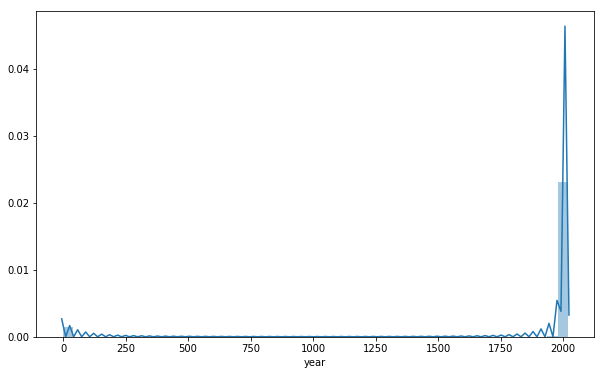

In [20]:
sns.distplot(df.year)

In [21]:
# Get rid of rows that are mistakes (including 0)
df = df[df.year > 1960]

## Now that the data is clean, we can start exploring

In [47]:
df.groupby(['school'])['title'].count()

school
Cornell     291
Davis      1493
Florida    2508
Ohio        420
TAMU       2766
Name: title, dtype: int64

In [45]:
df.name.nunique()

56

In [46]:
df.groupby('school').agg({'name': 'nunique'})

,name
school,
Cornell,2
Davis,12
Florida,22
Ohio,7
TAMU,14


In [22]:
# Count up the total number of publications for each professor
c = pd.DataFrame(df.groupby(['school','name'])['title'].size())
c = c.reset_index()
c.columns = ["school1", "name1", "count"]

# Get the year of the first paper for each professor
s = pd.DataFrame(df.groupby(['school','name'])['year'].min())
s = s.reset_index()
s.columns = ["school2", "name2", "year"]

total = pd.concat([c,s], axis = 1)
total = total.drop(total.columns[[3,4]], axis=1)
total.columns = ["school","name","count","year"]

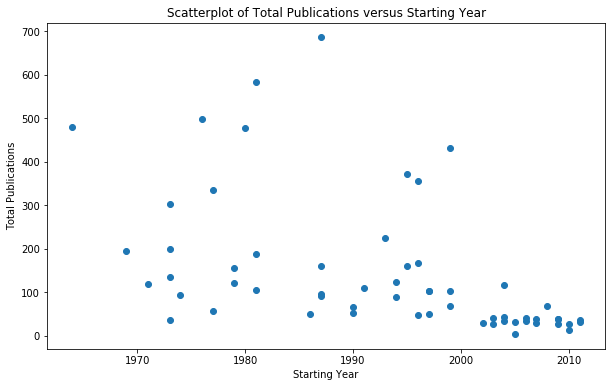

In [43]:
plt.scatter(x = "year", y = "count", data=total)
plt.title("Scatterplot of Total Publications versus Starting Year")
plt.ylabel("Total Publications")
plt.xlabel("Starting Year")

plt.show()

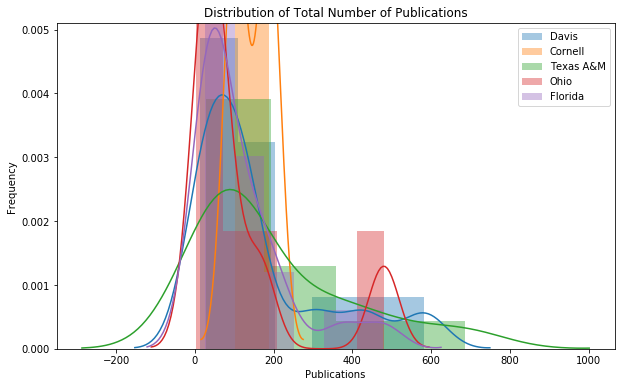

In [25]:
davis = total[total.school=="Davis"]["count"]
cornell = total[total.school=="Cornell"]["count"]
tamu = total[total.school=="TAMU"]["count"]
ohio = total[total.school=="Ohio"]["count"]
florida = total[total.school=="Florida"]["count"]

d = sns.distplot(davis)
sns.distplot(cornell)
sns.distplot(tamu)
sns.distplot(ohio)
sns.distplot(florida)
d.set(title = "Distribution of Total Number of Publications", 
      xlabel = "Publications", ylabel = "Frequency")
plt.legend(["Davis","Cornell", "Texas A&M", "Ohio", "Florida"]) 

plt.show()

In [ ]:
wordcloud = WordCloud(max_font_size=40, 
                      collocations=False).generate(str(df["title"].tolist()))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()